This notebook contains the code used in the BigComp 2022 paper: <br>
<b>Heeryon Cho, Woo-Kyu Kang, Younsoo Park, Sungeu Chae, and Seong-joon Kim, "Multi-label Facial Emotion Recognition Using Korean Drama Movie Clips," BigComp 2022.</b>
### Convolutional Neural Network (CNN) /  Classify 6 Basic Emotions

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rn
import os

In [2]:
import warnings
import logging
logging.getLogger('tensorflow').disabled = True
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# Record cell run time.
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.5 MB/s 
time: 610 µs (started: 2022-11-20 23:47:04 +00:00)


In [4]:
# Set seed for reproducibility.

set_seed = 46
np.random.seed(set_seed)
rn.seed(set_seed)
tf.random.set_seed(set_seed)

time: 804 µs (started: 2022-11-20 23:47:04 +00:00)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 17.5 s (started: 2022-11-20 23:47:04 +00:00)


In [6]:
!pip install --extra-index-url https://developer.download.nvidia.com/compute/redist --upgrade nvidia-dali-cuda110
!pip install --extra-index-url https://developer.download.nvidia.com/compute/redist --upgrade nvidia-dali-tf-plugin-cuda110

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://developer.download.nvidia.com/compute/redist
     |████████████████████████████████| 382.6 MB 29 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://developer.download.nvidia.com/compute/redist
     |████████████████████████████████| 418 kB 3.7 MB/s 
  Created wheel for nvidia-dali-tf-plugin-cuda110: filename=nvidia_dali_tf_plugin_cuda110-1.19.0-cp37-cp37m-linux_x86_64.whl size=120498 sha256=755b276f3c156dbe028e1bae968b6dd9b725bfc94531df05a007137acda52b5d
  Stored in directory: /root/.cache/pip/wheels/7f/8c/08/7adf9f8b758908640a1a1569489d8ab08a81a05192aa508363
Successfully built nvidia-dali-tf-plugin-cuda110
time: 46 s (started: 2022-11-20 23:47:21 +00:00)


### Load label data.

In [7]:
# Load labels, check headers, check data shape.
f_PATH = "/content/drive/MyDrive/facial_emotion_recognition_using_K-drama_dataset-main/"

df_label = pd.read_csv(f_PATH+'label/label_6_basic_emo.csv')
print(df_label.columns)
print(df_label.shape)

LABELS = list(df_label.columns[2:])
print("LABELS=", LABELS)
print("All class:", len(LABELS))

label_valid = pd.read_csv(f_PATH+'label/label_6_basic_emo_valid.csv')
label_train = pd.read_csv(f_PATH+'label/label_6_basic_emo_train.csv')
label_test = pd.read_csv(f_PATH+'label/label_6_basic_emo_test.csv')

VALID_DATA_SIZE = label_valid.shape[0]
TRAIN_DATA_SIZE = label_train.shape[0]
TEST_DATA_SIZE = label_test.shape[0]

print("TRAIN_DATA_SIZE:", label_train.shape[0])
print("VALID_DATA_SIZE:", label_valid.shape[0])
print("TEST_DATA_SIZE:", label_test.shape[0])

Index(['img_id', 'clip_id', 'angry', 'disgusted', 'surprised', 'fearful',
       'happy', 'sad'],
      dtype='object')
(12813, 8)
LABELS= ['angry', 'disgusted', 'surprised', 'fearful', 'happy', 'sad']
All class: 6
TRAIN_DATA_SIZE: 10249
VALID_DATA_SIZE: 1282
TEST_DATA_SIZE: 1282
time: 1.52 s (started: 2022-11-20 23:48:07 +00:00)


### Calculate class weights.

In [8]:
dict_label_train = {}
for idx, row in label_train.iterrows():
    dict_label_train[row['img_id']] = list(row['angry':'sad'].values)
len(dict_label_train)

10249

time: 1.83 s (started: 2022-11-20 23:48:09 +00:00)


In [9]:
y_train_ls = list(dict_label_train.values())
y_train_ls

[[0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0,

time: 87.3 ms (started: 2022-11-20 23:48:11 +00:00)


In [10]:
y_train_ints = [y.index(1) for y in y_train_ls]
y_train_ints

[5,
 5,
 4,
 0,
 5,
 0,
 0,
 2,
 2,
 0,
 5,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 5,
 0,
 0,
 0,
 3,
 0,
 0,
 5,
 1,
 3,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 2,
 2,
 5,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 4,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 5,
 0,
 0,
 5,
 0,
 0,
 0,
 5,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 5,
 2,
 0,
 0,
 0,
 4,
 5,
 2,
 3,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 5,
 0,
 0,
 0,
 2,
 2,
 5,
 2,
 0,
 0,
 5,
 0,
 0,
 0,
 2,
 0,
 5,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 5,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 5,
 5,
 0,
 2,
 0,
 0,
 5,
 0,
 2,
 2,
 0,
 2,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 4,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 5,
 0,
 5,
 0,
 2,
 2,
 0,
 2,
 3,
 0,
 0,
 2,
 0,
 0,
 5,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 2,
 5,
 3,
 5,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 5,
 0,
 2,
 5,


time: 17.2 ms (started: 2022-11-20 23:48:11 +00:00)


In [12]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique (y_train_ints),y=y_train_ints)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.2815040650406504,
 1: 18.3673835125448,
 2: 0.7868109933978198,
 3: 7.6257440476190474,
 4: 11.46420581655481,
 5: 1.106325561312608}

time: 134 ms (started: 2022-11-20 23:48:11 +00:00)


In [13]:
class_weights

array([ 0.28150407, 18.36738351,  0.78681099,  7.62574405, 11.46420582,
        1.10632556])

time: 7.47 ms (started: 2022-11-20 23:48:12 +00:00)


In [14]:
n_samples = len(dict_label_train)
n_classes = len(set(y_train_ints))

time: 593 µs (started: 2022-11-20 23:48:12 +00:00)


In [15]:
multiplier = 3
adjusted_cw = class_weights / n_classes * multiplier
adjusted_cw

array([0.14075203, 9.18369176, 0.3934055 , 3.81287202, 5.73210291,
       0.55316278])

time: 6.05 ms (started: 2022-11-20 23:48:12 +00:00)


In [16]:
log_weights = n_samples / (n_classes * np.log(np.bincount(y_train_ints)))
sum_weights = sum(log_weights)
sum_weights
custom_class_weights = log_weights / sum_weights
custom_class_weights

array([0.11638164, 0.22366313, 0.13195144, 0.18733217, 0.20259518,
       0.13807644])

time: 8.3 ms (started: 2022-11-20 23:48:12 +00:00)


In [17]:
custom_class_weights += adjusted_cw
custom_class_weights

array([0.25713368, 9.40735489, 0.52535693, 4.00020419, 5.93469809,
       0.69123922])

time: 3.23 ms (started: 2022-11-20 23:48:12 +00:00)


In [18]:
class_weight_dict = dict(enumerate(custom_class_weights))
class_weight_dict

{0: 0.25713367600252574,
 1: 9.407354888012607,
 2: 0.5253569344678802,
 3: 4.0002041936980595,
 4: 5.934698087278068,
 5: 0.6912392187757267}

time: 5.56 ms (started: 2022-11-20 23:48:12 +00:00)


### Define training pipeline.

In [19]:
from nvidia.dali.pipeline import Pipeline
import nvidia.dali.ops as ops
import nvidia.dali.fn as fn
import nvidia.dali.types as types
import nvidia.dali.tfrecord as tfrec
import nvidia.dali.plugin.tf as dali_tf

class TFRecordPipelineTrain(Pipeline):
    def __init__(self, batch_size, num_threads,
                 device = 'cpu', device_id = 0):
        super(TFRecordPipelineTrain, self).__init__(batch_size,
                                         num_threads,
                                         device_id)
        self.input = fn.readers.tfrecord(        
             features = {"image_raw": tfrec.FixedLenFeature((), tfrec.string, ""),
                         "label": tfrec.FixedLenFeature([6], tfrec.int64,  6)},
             path = [f_PATH+'tfrecords/6_basic_emo_train.tfrecords'],
             index_path = [f_PATH+'tfrecords/6_basic_emo_train.idx'],
             random_shuffle=True,
             seed = set_seed)
        self.iter = 0
    def define_graph(self):
        inputs = self.input
        images = fn.decoders.image(inputs["image_raw"], device = "mixed", output_type = types.RGB) / 255.
        labels = inputs["label"].gpu()
        return (images, labels)
    def iter_setup(self):
        pass

time: 117 ms (started: 2022-11-20 23:48:12 +00:00)


### Define validation pipeline.

In [20]:
class TFRecordPipelineValid(Pipeline):
    def __init__(self, batch_size, num_threads,
                 device = 'cpu', device_id = 0):
        super(TFRecordPipelineValid, self).__init__(batch_size,
                                         num_threads,
                                         device_id)
        self.input = fn.readers.tfrecord(        
             features = {"image_raw": tfrec.FixedLenFeature((), tfrec.string, ""),
                         "label": tfrec.FixedLenFeature([6], tfrec.int64,  6)},
             path = [f_PATH+'tfrecords/6_basic_emo_valid.tfrecords'],
             index_path = [f_PATH+'tfrecords/6_basic_emo_valid.idx'],
             random_shuffle=False,
             seed = set_seed)
        self.iter = 0
    def define_graph(self):
        inputs = self.input
        images = fn.decoders.image(inputs["image_raw"], device = "mixed", output_type = types.RGB) / 255.
        labels = inputs["label"].gpu()
        return (images, labels)
    def iter_setup(self):
        pass

time: 1.71 ms (started: 2022-11-20 23:48:12 +00:00)


### Train CNN model for classifying 6 basic emotions.

In [21]:
if __name__ == "__main__":
    batch_size = 64
    shapes = ((batch_size, 64, 64, 3),
              (batch_size, 6))
    pipe_train = TFRecordPipelineTrain(batch_size=batch_size, 
                                 num_threads=1, 
                                 device='gpu', 
                                 device_id=0)

    batch_size_valid = 64
    shapes_valid = ((batch_size_valid, 64, 64, 3),
              (batch_size_valid, 6))
    pipe_valid = TFRecordPipelineValid(batch_size=batch_size_valid, 
                                 num_threads=1, 
                                 device='gpu', 
                                 device_id=0)  
    
    with tf.device('/gpu:0'):
        ds_train = dali_tf.DALIDataset(
            pipeline=pipe_train,
            batch_size=batch_size,
            output_shapes=shapes,
            output_dtypes=(tf.float32, tf.int64),
            device_id=0)
        
        ds_valid = dali_tf.DALIDataset(
            pipeline=pipe_valid,
            batch_size=batch_size_valid,
            output_shapes=shapes_valid,
            output_dtypes=(tf.float32, tf.int64),
            device_id=0)    
        
        initializer = keras.initializers.GlorotUniform(seed=set_seed)
        activation =  keras.activations.softmax
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1e-5,
            decay_steps=TRAIN_DATA_SIZE // batch_size * 10,
            decay_rate=0.95)

        number_of_classes = 6
        
        inputs = keras.Input(shape=(64, 64, 3))
        conv1 = keras.layers.Conv2D(128,(3, 3), padding='same', activation='relu')(inputs)
        do1 = keras.layers.Dropout(0.5, seed=set_seed)(conv1)         
        conv2 = keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu')(do1)
        do2 = keras.layers.Dropout(0.5, seed=set_seed)(conv2)         
        conv3 = keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu')(do2)
        do3 = keras.layers.Dropout(0.5, seed=set_seed)(conv3)       
        flatten = keras.layers.Flatten()(do3)    
        outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(flatten) 
        clf = keras.Model(inputs, outputs)
        
        clf.summary()

        # Apply early stopping.        
        es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                                       restore_best_weights=True)
        
        clf.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
        
        history = clf.fit(ds_train, steps_per_epoch=TRAIN_DATA_SIZE // batch_size,
                          validation_data=ds_valid.take(VALID_DATA_SIZE // batch_size_valid),
                          epochs=1000,
                          class_weight=class_weight_dict,
                          )#callbacks=[es_callback])    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 dropout (Dropout)           (None, 64, 64, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 32)        0     

In [22]:
from keras.models import load_model
clf.save('/content/drive/MyDrive/facial_emotion_recognition_using_K-drama_dataset-main/model/cnn_6.h5')

time: 550 ms (started: 2022-11-21 02:53:31 +00:00)


In [23]:
# List all data in history.

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
time: 811 µs (started: 2022-11-21 02:53:32 +00:00)


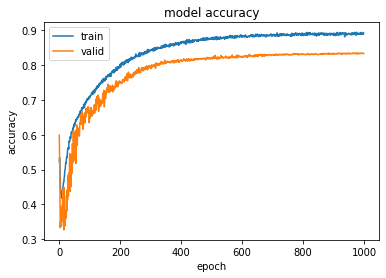

time: 269 ms (started: 2022-11-21 02:53:32 +00:00)


In [24]:
# Summarize history for accuracy.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

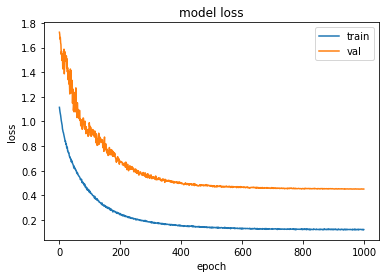

time: 227 ms (started: 2022-11-21 02:53:32 +00:00)


In [25]:
# Summarize history for loss.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Define test pipeline.

In [26]:
class TFRecordPipelineTest(Pipeline):
    def __init__(self, batch_size, num_threads,
                 device = 'cpu', device_id = 0):
        super(TFRecordPipelineTest, self).__init__(batch_size,
                                         num_threads,
                                         device_id)
        self.input = fn.readers.tfrecord(        
             features = {"image_raw": tfrec.FixedLenFeature((), tfrec.string, ""),
                         "label": tfrec.FixedLenFeature([6], tfrec.int64,  6)},
             path = [f_PATH+'tfrecords/6_basic_emo_test.tfrecords'],
             index_path = [f_PATH+'tfrecords/6_basic_emo_test.idx'],
             random_shuffle=False,
             seed = set_seed)
        self.iter = 0
    def define_graph(self):
        inputs = self.input
        images = fn.decoders.image(inputs["image_raw"], device = "mixed", output_type = types.RGB) / 255.
        labels = inputs["label"].gpu()
        return (images, labels)
    def iter_setup(self):
        pass

time: 17.4 ms (started: 2022-11-21 02:53:32 +00:00)


### Check test data accuracy.

In [27]:
# https://docs.nvidia.com/deeplearning/dali/user-guide/docs/plugins/tensorflow_plugin_api.html

if __name__ == "__main__":
    batch_size = 1
    shapes = ((batch_size, 64, 64, 3),
              (batch_size, 6))
    pipe_test = TFRecordPipelineTest(batch_size=batch_size, 
                            num_threads=4, 
                            device='gpu', 
                            device_id=0)

    with tf.device('/gpu:0'):
    #with strategy.scope():        
        # Create dataset
        ds_test = dali_tf.DALIDataset(
            pipeline=pipe_test,
            batch_size=batch_size,
            output_shapes=shapes,
            output_dtypes=(tf.float32, tf.int64),
            device_id=0)
        print(ds_test)
        loss, acc = clf.evaluate(ds_test, steps=TEST_DATA_SIZE)
        print("Test accuracy:", acc)
        predictions = clf.predict(ds_test.take(5))
        print("A test output from the last layer:", predictions[0])
        print("Index of the maximum value:", np.argmax(predictions[0]))
        print("Label:", LABELS[np.argmax(predictions[0])])

<DALIDataset element_spec=(TensorSpec(shape=(1, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 6), dtype=tf.int64, name=None))>
1282/1282 [==============================] - 6s 4ms/step - loss: 0.4088 - accuracy: 0.8510
Test accuracy: 0.8510140180587769
5/5 [==============================] - 0s 3ms/step
A test output from the last layer: [5.6967431e-01 7.4000366e-04 3.9824024e-01 1.2921306e-02 1.6213171e-05
 1.8407891e-02]
Index of the maximum value: 0
Label: angry
time: 5.79 s (started: 2022-11-21 02:53:32 +00:00)


In [28]:
predictions

array([[5.6967431e-01, 7.4000366e-04, 3.9824024e-01, 1.2921306e-02,
        1.6213171e-05, 1.8407891e-02],
       [1.4970954e-04, 1.7955180e-07, 1.5663605e-06, 2.2397495e-05,
        9.9329045e-10, 9.9982613e-01],
       [8.4422255e-01, 2.0527806e-04, 1.4397784e-01, 8.7544595e-06,
        6.2561446e-07, 1.1584947e-02],
       [9.9213952e-01, 1.0323550e-07, 5.6529054e-03, 3.2287462e-05,
        4.7951289e-07, 2.1746515e-03],
       [9.9513632e-01, 1.4741904e-11, 4.3140263e-03, 1.6376060e-07,
        1.5778256e-13, 5.4954935e-04]], dtype=float32)

time: 6.15 ms (started: 2022-11-21 02:53:38 +00:00)


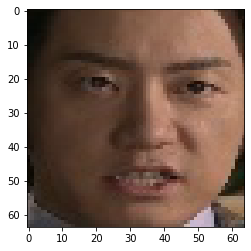

time: 155 ms (started: 2022-11-21 02:53:38 +00:00)


In [29]:
# Display the tested image.

import matplotlib.pyplot as plt

data, = ds_test.take(1)
plt.imshow(data[0][0])

In [30]:
# Check the test data's true label.
data[1]

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[1, 0, 0, 0, 0, 0]])>

time: 4.62 ms (started: 2022-11-21 02:53:38 +00:00)


In [31]:
data

(<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
 array([[[[0.03921569, 0.03529412, 0.01176471],
          [0.05098039, 0.04705882, 0.02352941],
          [0.04705882, 0.05098039, 0.02352941],
          ...,
          [0.14509805, 0.08627451, 0.05882353],
          [0.08235294, 0.0627451 , 0.03137255],
          [0.09411765, 0.07450981, 0.04313726]],
 
         [[0.03921569, 0.03529412, 0.01176471],
          [0.04313726, 0.03921569, 0.01568628],
          [0.03529412, 0.03921569, 0.01176471],
          ...,
          [0.17254902, 0.11372549, 0.08627451],
          [0.08627451, 0.06666667, 0.03529412],
          [0.09411765, 0.07450981, 0.04313726]],
 
         [[0.04313726, 0.04313726, 0.02745098],
          [0.04313726, 0.04313726, 0.02745098],
          [0.03137255, 0.04313726, 0.02352941],
          ...,
          [0.21568628, 0.12941177, 0.09411765],
          [0.11372549, 0.06666667, 0.03529412],
          [0.15294118, 0.10588235, 0.07450981]],
 
         ...,
 
         

time: 7.53 ms (started: 2022-11-21 02:53:38 +00:00)


In [32]:
pred_test = clf.predict(ds_test.take(TEST_DATA_SIZE))

1282/1282 [==============================] - 3s 2ms/step
time: 3.47 s (started: 2022-11-21 02:53:38 +00:00)


In [33]:
true_test = np.concatenate([y for x, y in ds_test.take(TEST_DATA_SIZE)], axis=0)

time: 1.24 s (started: 2022-11-21 02:53:42 +00:00)


In [34]:
true_test.shape

(1282, 6)

time: 3.63 ms (started: 2022-11-21 02:53:43 +00:00)


In [35]:
from sklearn.metrics import confusion_matrix

pred_test_ls = []
true_test_ls = []
for (pred, true) in zip(pred_test, true_test):
    pred_test_ls.append(np.argmax(pred))
    true_test_ls.append(np.argmax(true))

cf_matrix_test = confusion_matrix(true_test_ls, pred_test_ls)
cf_matrix_test

array([[670,   1,  36,   5,   8,  39],
       [  0,   9,   0,   0,   2,   1],
       [ 47,   1, 207,   3,   2,  12],
       [  1,   0,   2,  25,   0,   0],
       [  1,   0,   0,   0,  17,   0],
       [ 19,   0,   7,   1,   3, 163]])

time: 68.8 ms (started: 2022-11-21 02:53:43 +00:00)


Text(33.0, 0.5, 'True')

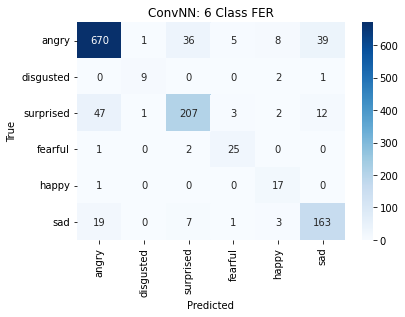

time: 703 ms (started: 2022-11-21 02:53:43 +00:00)


In [36]:
import seaborn as sns

sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', xticklabels=LABELS, yticklabels=LABELS, fmt='g')
plt.title('ConvNN: 6 Class FER')
plt.xlabel('Predicted')
plt.ylabel('True')

### Check train data accuracy.

In [37]:
# https://docs.nvidia.com/deeplearning/dali/user-guide/docs/plugins/tensorflow_plugin_api.html

if __name__ == "__main__":
    batch_size = 1
    shapes = ((batch_size, 64, 64, 3),
              (batch_size, 6))
    pipe_train = TFRecordPipelineTrain(batch_size=batch_size, 
                            num_threads=4, 
                            device='gpu', 
                            device_id=0)

    with tf.device('/gpu:0'):
        ds_train = dali_tf.DALIDataset(
            pipeline=pipe_train,
            batch_size=batch_size,
            output_shapes=shapes,
            output_dtypes=(tf.float32, tf.int64),
            device_id=0)
        loss, acc = clf.evaluate(ds_train, steps=TRAIN_DATA_SIZE)
        print("Train accuracy:", acc)
        #predictions = clf.predict(ds_train.take(1))
        #print("A test output from the last layer:", predictions[0])
        #print("Index of the maximum value:", np.argmax(predictions[0]))
        #print("Label:", LABELS[np.argmax(predictions[0])])

10249/10249 [==============================] - 40s 4ms/step - loss: 0.2425 - accuracy: 0.9206
Train accuracy: 0.9205776453018188
time: 39.6 s (started: 2022-11-21 02:53:44 +00:00)


In [38]:
pred_train = clf.predict(ds_train.take(TRAIN_DATA_SIZE))

10249/10249 [==============================] - 22s 2ms/step
time: 24 s (started: 2022-11-21 02:54:23 +00:00)


In [39]:
true_train = np.concatenate([y for x, y in ds_train.take(TRAIN_DATA_SIZE)], axis=0)

time: 5.47 s (started: 2022-11-21 02:54:47 +00:00)


In [40]:
true_train.shape

(10249, 6)

time: 8.71 ms (started: 2022-11-21 02:54:53 +00:00)


In [41]:
pred_train_ls = []
true_train_ls = []
for (pred, true) in zip(pred_train, true_train):
    pred_train_ls.append(np.argmax(pred))
    true_train_ls.append(np.argmax(true))

cf_matrix_train = confusion_matrix(true_train_ls, pred_train_ls)
cf_matrix_train

array([[5591,   27,  216,   11,   22,  201],
       [   0,   93,    0,    0,    0,    0],
       [ 189,    2, 1910,    1,    6,   63],
       [   0,    0,    0,  224,    0,    0],
       [   0,    0,    0,    0,  149,    0],
       [  54,    0,   19,    1,    2, 1468]])

time: 43.8 ms (started: 2022-11-21 02:54:53 +00:00)


Text(33.0, 0.5, 'True')

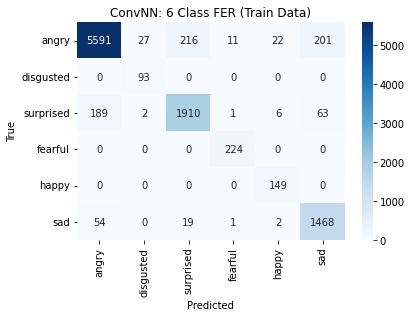

time: 305 ms (started: 2022-11-21 02:54:53 +00:00)


In [42]:
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues', xticklabels=LABELS, yticklabels=LABELS, fmt='g')
plt.title('ConvNN: 6 Class FER (Train Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

time: 316 ms (started: 2022-11-21 02:54:53 +00:00)
